Using cache found in C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-8 Python-3.10.0 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Image loaded successfully!


image 1/1: 163x174 1 person, 1 tie
Speed: 8.3ms pre-process, 225.2ms inference, 15.0ms NMS per image at shape (1, 3, 608, 640)


YOLO Results:


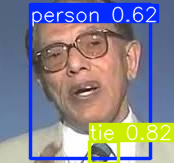

Columns in DataFrame: Index(['xcenter', 'ycenter', 'width', 'height', 'confidence', 'class', 'name'], dtype='object')
Objects detected:      xcenter    ycenter       width      height  confidence  class    name
1  90.426216  81.622124  119.599541  154.526779    0.616113      0  person
Row in objects: xcenter        90.426216
ycenter        81.622124
width         119.599541
height        154.526779
confidence      0.616113
class                  0
name              person
Name: 1, dtype: object


In [11]:
import cv2
import torch
import face_recognition
import os
from matplotlib import pyplot as plt

# تحميل موديل YOLO
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# تحميل الصورة
img_path = 'test/7.jfif'  # تأكد من المسار الصحيح للصورة
img = cv2.imread(img_path)

if img is None:
    print("Error: Image not found!")
else:
    print("Image loaded successfully!")

# إجراء اكتشاف الأجسام باستخدام YOLO
results = model(img_path)

# طباعة النتائج لاكتشاف الأجسام
print("YOLO Results:")
results.print()  # طباعة التفاصيل المكتشفة
results.show()  # عرض الصورة مع المربعات التي رسمها YOLO

# تحويل الصورة إلى RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# استخراج المعلومات حول الأجسام المكتشفة (مربعات الحدود)
# الحصول على أول DataFrame من النتائج
df = results.pandas().xywh[0]  # الوصول إلى أول DataFrame في القائمة

# طباعة الأعمدة المتاحة في DataFrame
print("Columns in DataFrame:", df.columns)

# تصفية الأجسام التي تم اكتشافها كـ "person"
if 'name' in df.columns:
    objects = df[df['name'] == 'person']
else:
    print("The 'name' column is not present in the results.")

# طباعة الأجسام المكتشفة
print("Objects detected:", objects)

# إعداد مجموعة البيانات والتعرف على الوجوه
train_path = os.path.join("dataset")  # مسار البيانات الخاصة بك
train_encodes = []
train_classes = []

# المرور عبر مجموعة الأشخاص في الداتا سيت
for person_name in os.listdir(train_path):
    person_folder = os.path.join(train_path, person_name)
    
    if not os.path.isdir(person_folder):
        continue  # تخطي لو مش مجلد

    for image_name in os.listdir(person_folder):
        image_path = os.path.join(person_folder, image_name)
        img_person = cv2.imread(image_path)
        img_person_rgb = cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB)

        # استخراج أكواد الوجوه
        encodings = face_recognition.face_encodings(img_person_rgb)
        if encodings:
            train_encodes.append(encodings[0])  # حفظ الكود الخاص بالوجه
            train_classes.append(person_name)  # حفظ اسم الشخص

# اختبار الصورة: التعرف على كل وجه على حدة
if len(objects) > 0:
    for _, obj in objects.iterrows():
        # طباعة الأعمدة للتأكد من وجود القيم الصحيحة
        print("Row in objects:", obj)

        # استخراج النطاقات المكتشفة من YOLO
        if 'ymin' in obj and 'ymax' in obj and 'xmin' in obj and 'xmax' in obj:
            top = int(obj['ymin'])
            bottom = int(obj['ymax'])
            left = int(obj['xmin'])
            right = int(obj['xmax'])
            
            # استخراج الأكواد للوجوه ضمن النطاقات التي حددتها YOLO


Using cache found in C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-8 Python-3.10.0 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Image loaded successfully!


C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


YOLO Results:


image 1/1: 549x976 8 persons
Speed: 542.2ms pre-process, 1070.2ms inference, 66.6ms NMS per image at shape (1, 3, 384, 640)


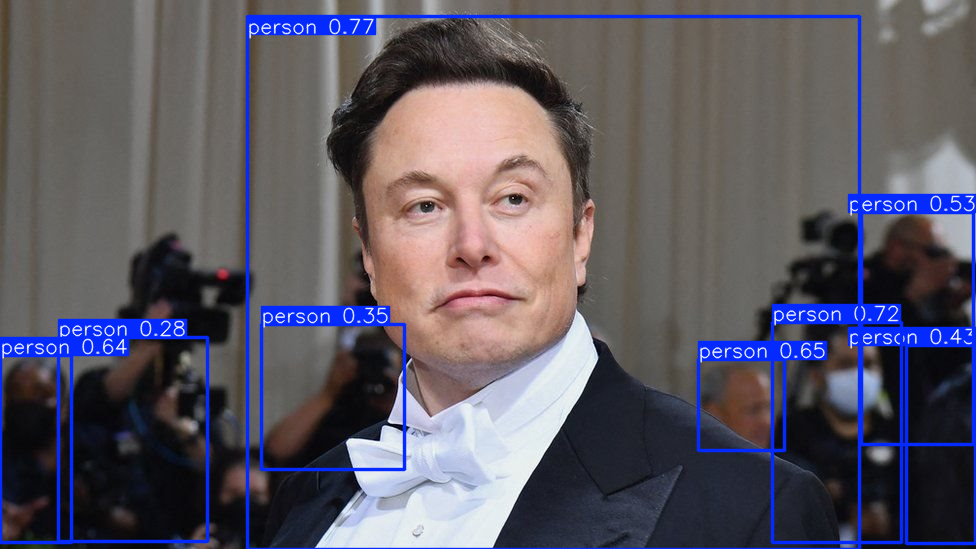

Columns in DataFrame: Index(['xcenter', 'ycenter', 'width', 'height', 'confidence', 'class', 'name'], dtype='object')
Objects detected:       xcenter     ycenter       width      height  confidence  class    name
0  553.450134  282.928833  611.563965  532.142334    0.767269      0  person
1  836.902954  432.766113  128.567627  220.125397    0.715537      0  person
2  741.594116  405.063385   86.055847   90.234924    0.645192      0  person
3   35.825783  449.391418   71.651566  186.833649    0.637155      0  person
4  917.645630  328.299744  111.834534  231.971283    0.527771      0  person
5  941.121460  444.507202   69.602356  197.519623    0.427146      0  person
6  332.509155  396.847534  143.004608  145.645782    0.352068      0  person
7  133.050171  439.902344  148.523483  203.887299    0.280401      0  person
Row in objects: xcenter       553.450134
ycenter       282.928833
width         611.563965
height        532.142334
confidence      0.767269
class                  0
name 

In [13]:
import cv2
import torch
import face_recognition
import os
from matplotlib import pyplot as plt

# تحميل موديل YOLO
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# تحميل الصورة
img_path = 'test/elon8.jpg'  # تأكد من المسار الصحيح للصورة
img = cv2.imread(img_path)

if img is None:
    print("Error: Image not found!")
else:
    print("Image loaded successfully!")

# إجراء اكتشاف الأجسام باستخدام YOLO
results = model(img_path)

# طباعة النتائج لاكتشاف الأجسام
print("YOLO Results:")
results.print()  # طباعة التفاصيل المكتشفة
results.show()  # عرض الصورة مع المربعات التي رسمها YOLO

# تحويل الصورة إلى RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# استخراج المعلومات حول الأجسام المكتشفة (مربعات الحدود)
# الحصول على أول DataFrame من النتائج
df = results.pandas().xywh[0]  # الوصول إلى أول DataFrame في القائمة

# طباعة الأعمدة المتاحة في DataFrame
print("Columns in DataFrame:", df.columns)

# تصفية الأجسام التي تم اكتشافها كـ "person"
if 'name' in df.columns:
    objects = df[df['name'] == 'person']
else:
    print("The 'name' column is not present in the results.")

# طباعة الأجسام المكتشفة
print("Objects detected:", objects)

# إعداد مجموعة البيانات والتعرف على الوجوه
train_path = os.path.join("dataset")  # مسار البيانات الخاصة بك
train_encodes = []
train_classes = []

# المرور عبر مجموعة الأشخاص في الداتا سيت
for person_name in os.listdir(train_path):
    person_folder = os.path.join(train_path, person_name)
    
    if not os.path.isdir(person_folder):
        continue  # تخطي لو مش مجلد

    for image_name in os.listdir(person_folder):
        image_path = os.path.join(person_folder, image_name)
        img_person = cv2.imread(image_path)
        img_person_rgb = cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB)

        # استخراج أكواد الوجوه
        encodings = face_recognition.face_encodings(img_person_rgb)
        if encodings:
            train_encodes.append(encodings[0])  # حفظ الكود الخاص بالوجه
            train_classes.append(person_name)  # حفظ اسم الشخص

# اختبار الصورة: التعرف على كل وجه على حدة
if len(objects) > 0:
    for _, obj in objects.iterrows():
        # طباعة الأعمدة للتأكد من وجود القيم الصحيحة
        print("Row in objects:", obj)

        # استخراج النطاقات المكتشفة من YOLO
        if 'ymin' in obj and 'ymax' in obj and 'xmin' in obj and 'xmax' in obj:
            top = int(obj['ymin'])
            bottom = int(obj['ymax'])
            left = int(obj['xmin'])
            right = int(obj['xmax'])
            
            # قص الصورة بناءً على مربع الشخص المكتشف
            img_person_area = img_rgb[top:bottom, left:right]

            # استخراج الأكواد للوجوه ضمن النطاقات التي حددتها YOLO
            face_locations = face_recognition.face_locations(img_person_area, model="hog")
            
            if len(face_locations) > 0:
                test_encodings = face_recognition.face_encodings(img_person_area, face_locations)
                
                for (top, right, bottom, left), img_encoding in zip(face_locations, test_encodings):
                    # مقارنة الأكواد المخزنة في الداتا سيت
                    matches = face_recognition.compare_faces(train_encodes, img_encoding)
                    face_name = "Unknown"

                    # العثور على أول تطابق صحيح
                    if True in matches:
                        first_match_index = matches.index(True)
                        face_name = train_classes[first_match_index]
                    else:
                        face_name = "Unknown"

                    # رسم المستطيل حول الوجه
                    cv2.rectangle(img_rgb, (left + obj['xmin'], top + obj['ymin']), (right + obj['xmin'], bottom + obj['ymin']), (0, 255, 0), 2)

                    # كتابة الاسم تحت المستطيل
                    cv2.putText(img_rgb, face_name, (left + obj['xmin'], bottom + obj['ymin'] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# عرض الصورة مع المربعات باستخدام matplotlib
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.title(f"Detected Faces and Objects")
plt.imshow(img_rgb)  # تم التأكد أن الصورة في RGB بالفعل
plt.show()
